# Learning goals
The goal of this notebook is to familiarize the reader with three common clustering methods, KMEANS, DBSCAN, and GMM (Gaussian Mixture Model). You will first use synthetic 2D clusters produced with sklearn's "make_blobs" to look at the effect of these methods parameters on their performance. Then you'll work through an application to image segmentation. And finally you'll combine dimension reduction with clustering to analyze a gene expression data set.

## Problem 1 - Blobs - HOMEWORK

Use the make_blobs function to produce a data set consisting of 15, 2D clusters with 10,000 points. Then cluster this data three times, once using KMEANS, a second using DBSCAN, and a third using a Gaussian Mixture Model (use sklearns implementations).

For KMEANS, there is one critical hyper-parameter, the number of clusters. Screen over a range of cluster sizes (say 1-20). For each value of this hyper-parameter, calculate the "normalized mutual information" (you'll need to look this up, but I've provided some helper functions if you want to use them, or write your own of course). This is an information theoretic metric that allows you to compare the predicted and known cluster identities of for every point to quantify how well the clustering performed. Plot the NMI vs cluster size for kmeans. What is the optimal number of clusters? How sensitive is the quality of results to this parameter? For that optimal number, plot the clustered data (using the predicted labels, not the true ones). If useful to you, plot it for near optimal cluster sizes as well.

For DBSCAN there are two key parameters: "epsilon" determines how far DBSCAN looks for neighbors and "min_samples", which effectively determines what a clusters minimum size is (can you have a cluster of size 3 for example). Scan over a range of values of these two parameters, again using NMI to determine quality of results. For the optimal parameters, how many clusters are there? Plot your results for this. How sensitive are results to these parameters?

For the GaussianMixture, you'll once again need to vary the number of distributions (e.g. the number of expected clusters) in the mixture to determine what is best.

##########

For a second phase, import the data from "Clustering_data.csv" which you'll notice (if plotting it in 2D) is skewed data. Perform clustering using the GMM, DBSCAN, and KMEANS on this data. No need to provide a full analysis. Just present your results with the best versions of the associated parameters for each method.

The optimal number of clusters is:  15


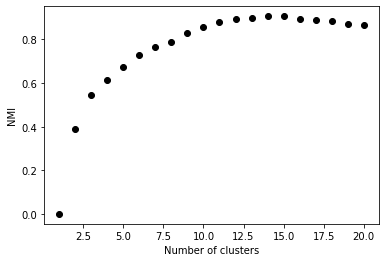

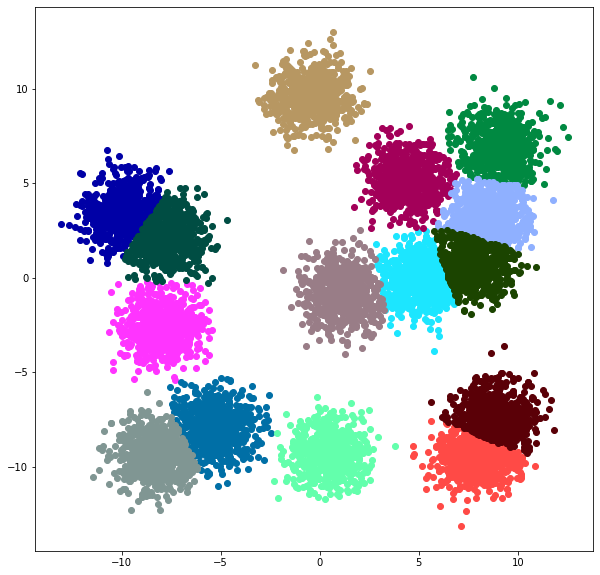

In [3]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from itertools import cycle, islice
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font',**{'size':16})

from sklearn.datasets import make_blobs

%matplotlib inline
np.random.seed(0)

from collections import OrderedDict

cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plot_clustering(X,y):
    plt.figure(figsize=(10,10))
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        plt.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)])
    plt.show()

#  ########################################################################################## #
# Use make_blobs function to produce a data set consisting of 15, 2D clusters with 10,000 points
for i in range(15):
    X, y = make_blobs(n_samples = 10000, centers = 15)


########################
# Cluster with KMEANS (screen over 1-20 cluster sizes, calculate NMI)
kmean_NMI_array = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
    y_pred = kmeans.predict(X)

    kmean_NMI  = NMI(y, y_pred)
    kmean_NMI_array = np.append(kmean_NMI_array, kmean_NMI)
#print(kmean_NMI_array)

# Plot NMI vs cluster size

cluster_size = np.linspace(1,20,20)    
plt.plot(cluster_size, kmean_NMI_array, 'o', color='black');
plt.xlabel("Number of clusters")
plt.ylabel("NMI")

print("The optimal number of clusters is: ", np.argmax(kmean_NMI_array)+1) # max NMI value to find optimal number of clusters

# Plot clustered data
kmeans = KMeans(n_clusters=15, random_state=1).fit(X)
y_pred = kmeans.predict(X)
plot_clustering(X,y_pred)

[]
The optimal paramters are epsilon = 0.5, min_samples = 100


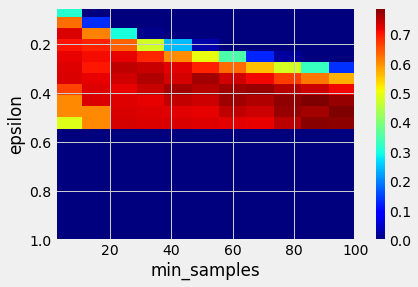

Number of clusters:  10


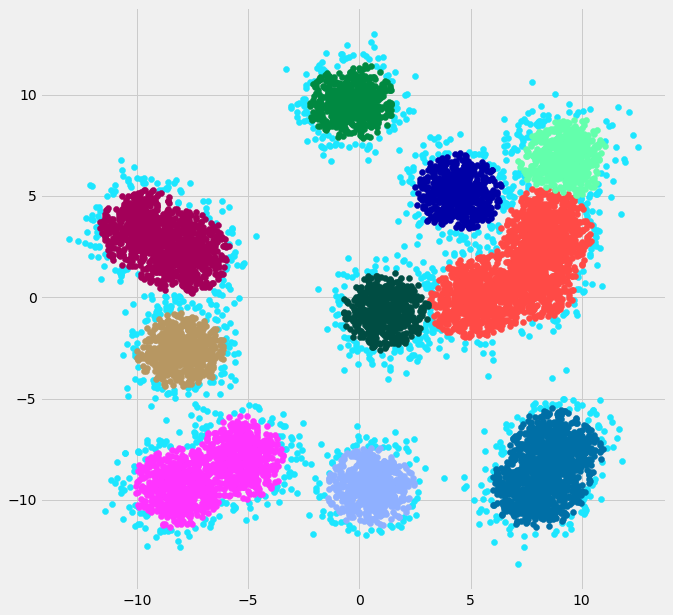

In [153]:
##########################
# Cluster with DBSCAN
dbscan_NMI_array = []
# epsvals = np.linspace(0.05,0.5,11)
# msamples = np.linspace(5,20,11)

epsvals = np.linspace(0.05,1,11)
msamples = np.linspace(2,100,11)
dbscan_NMI = np.zeros((21,11))

for i in range(11):
    for j in range(11):
        dbscan = DBSCAN(eps=epsvals[i], min_samples=msamples[j]).fit(X)
        y_pred = dbscan.labels_
        
        dbscan_NMI[i,j]  = NMI(y, y_pred)

    
print(dbscan_NMI_array)    


print("The optimal paramters are epsilon = 0.5, min_samples = 100")
fig = plt.figure()
ax = fig.add_subplot(111)
heatmap=ax.imshow(dbscan_NMI,cmap='jet', interpolation='none',extent=[2,100,epsvals[-1],epsvals[0]], origin='upper',aspect='auto')
cbar=fig.colorbar(heatmap,ax=ax)
ax.set_xlabel('min_samples')
ax.set_ylabel('epsilon')
plt.show()
    
# Plot clustered data
dbscan = DBSCAN(eps=0.8, min_samples=100).fit(X)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters: ", n_clusters)
y_pred = dbscan.labels_
plot_clustering(X,y_pred)    

The optimal number of clusters is:  15


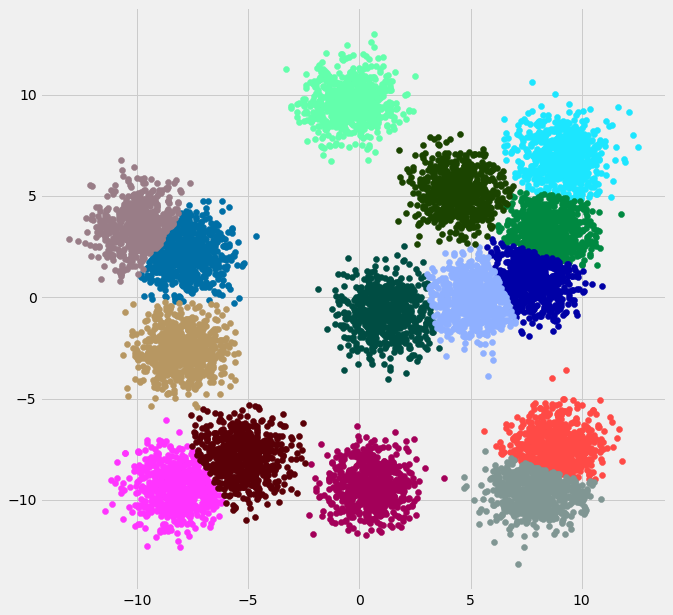

The results are very sensitive to the changes in the parameters.


In [155]:
############################
# Cluster with Gaussian Mixture Model
gm_NMI_array = []
for i in range(1,21):
    gm = GaussianMixture(n_components=i, random_state=0).fit(X)
    y_pred = gm.predict(X)

    gm_NMI  = NMI(y, y_pred)
    gm_NMI_array = np.append(gm_NMI_array, gm_NMI)
#print(gm_NMI_array)


print("The optimal number of clusters is: ", np.argmax(gm_NMI_array)+1) # max NMI value to find optimal number of clusters

# Plot clustered data
gm = GaussianMixture(n_components=15, random_state=0).fit(X)
y_pred = gm.predict(X)
plot_clustering(X,y_pred)

print("The results are very sensitive to the changes in the parameters.")

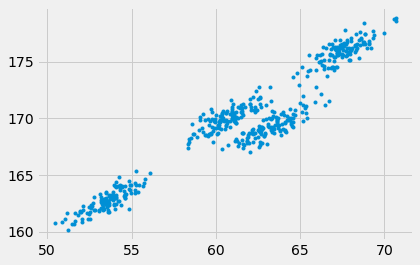

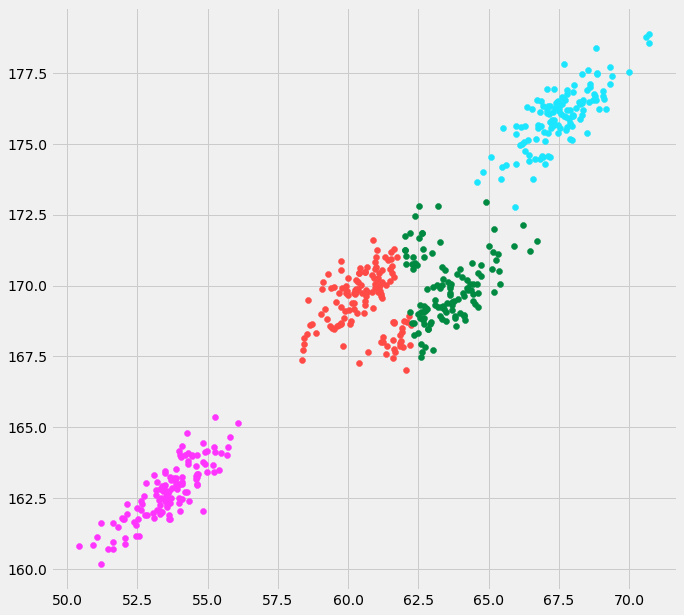

In [156]:
#######################
# Import Clustering_data.csv
df = pd.read_csv (r'D:\Mayna\Documents\PHYS8100\Clustering_data.csv')
#print (df)
x = df.to_numpy()
#print(x)
plt.plot(x[:,0],x[:,1],'.')
plt.show()


clusters = 4
kmeans = KMeans(n_clusters = clusters, random_state = 0).fit(x)
y_pred = kmeans.predict(x)

plot_clustering(x,y_pred)


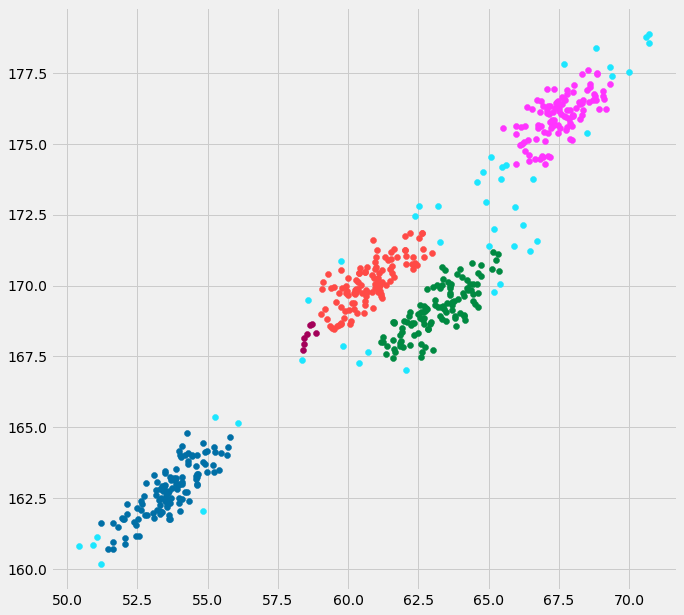

In [157]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(x)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
y_pred = labels
plot_clustering(x,y_pred) 

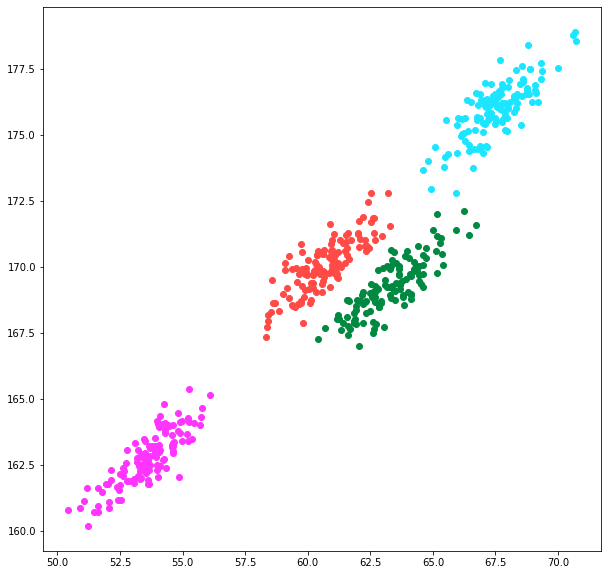

In [14]:
gm = GaussianMixture(n_components=4, random_state=0).fit(x)
y_pred = gm.predict(x)
plot_clustering(x,y_pred)

In [158]:
# n_true_center = 15

# np.random.seed(0)

# print("------> Example with %i true cluster centers <-------"%n_true_center)

# X, y = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
# X = StandardScaler().fit_transform(X)

# cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

# def plot_clustering(X,y):
#     plt.figure(figsize=(10,10))
#     for i, yu in enumerate(np.unique(y)):
#         pos = (y == yu)
#         plt.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)])
#     plt.show()

# plot_clustering(X,y)

In [2]:
# Helper functions to calculate normalized mutual information (https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

# Problem 2 - IN CLASS

Image segmentation by gaussian mixture model

Here we'll look at a simple example to see how gaussian mixture models can be used in image segmentation. The next cell of code produces a numpy array representing a monochromatic image (only one color channel). Note that there are three image creation lines of code that produce qualitatively different types of images. Try the below for each.

Task 1: Plot a histogram distribution of pixel intensities.

Task 2a: Fit a gaussian mixture model the pixel data. Note that you'll have to reshape the data from a 256x256 square image into a 1 x (256^2) vector of intensities. How many gaussians should you assume are part of your mixture? Do this for each of the three images that the code below produces.

Task 2b: Your classifier will return means of the gaussians that form your mixture. Plot a black and white image showing the pixels assigned to each of your gaussians. If you assume two gaussians, plot two masks. If you assume three, plot three masks.



In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(41)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(3.*n))

mask = (im > im.mean()).astype(float)
mask1 = (im < 0.35*im.mean()).astype(float)
mask2 = (im > 0.65*im.mean()).astype(float)

#This is the base image.
img1 = mask + 0.3*np.random.randn(*mask.shape)

#This line of code creates a much fuzzier image, give it a try.
img2 = 0.5*mask1 + 0.1*mask2 + 0.3*np.random.randn(*mask.shape)

# This one creates an image with a border like structure
img3 = 1*mask1 + 1*mask2 + 0.3*np.random.randn(*mask.shape)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, sharex = True, figsize = (15,15))

ax1.imshow(img1)
ax1.axis('off')
ax2.imshow(img2)
ax2.axis('off')
ax3.imshow(img3)
ax3.axis('off')

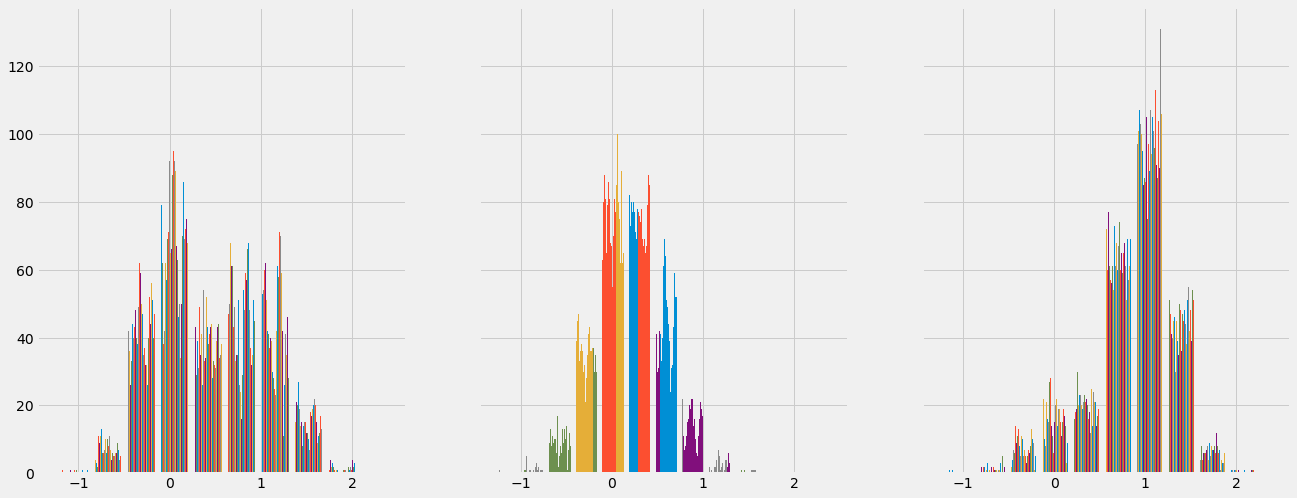

From these histograms, Image 1 would have 2 gaussians, Image 2 would have 1 gaussian, and Image 3 would have 2 gaussians. This is from the number of approximate means/humps there are in the histograms.


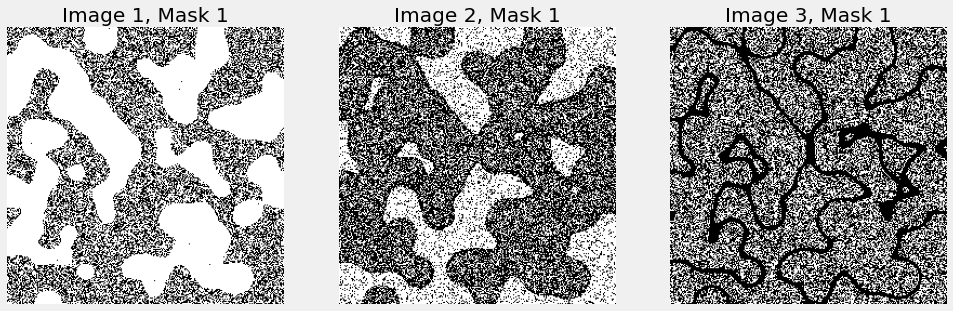

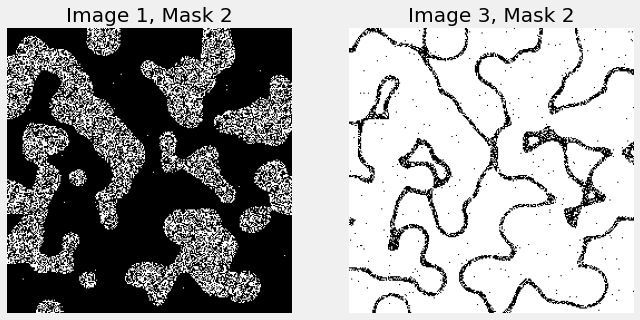

In [159]:
# Task 1 plot histogram
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, sharex = True, figsize = (20,8))
ax1.hist(img1)
ax2.hist(img2)
ax3.hist(img3)
plt.show()

# Task 2a: fit a gaussian mixture model to the pixel data

gm1 = GaussianMixture(n_components=2)
gm1.fit(img1.reshape((img1.size,1)))
        
gm2 = GaussianMixture(n_components=1)
gm2.fit(img2.reshape((img2.size,1)))
        
gm3 = GaussianMixture(n_components=2)
gm3.fit(img3.reshape((img3.size,1)))
        
# image 1 means
threshold1 = gm1.means_[0]
threshold2 = gm1.means_[1]
img1_mask1 = img1 > threshold1
img1_mask2 = img1 > threshold2
        
# image 2 means
threshold1 = gm2.means_[0]
img2_mask1 = img2 > threshold1

# image 3 means
threshold1 = gm3.means_[0]
threshold2 = gm3.means_[1]
img3_mask1 = img3 > threshold1
img3_mask2 = img3 > threshold2
        
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, sharex = True, figsize = (15,15))
ax1.imshow(img1_mask1, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Image 1, Mask 1')

ax2.imshow(img2_mask1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Image 2, Mask 1')
        
ax3.imshow(img3_mask1, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Image 3, Mask 1')

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, sharex = True, figsize = (10,10))

ax1.imshow(img1_mask2, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Image 1, Mask 2')

        
ax2.imshow(img3_mask2, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Image 3, Mask 2')

print("From these histograms, Image 1 would have 2 gaussians, Image 2 would have 1 gaussian, and Image 3 would have 2 gaussians. This is from the number of approximate means/humps there are in the histograms.")

# Problem 3 -  IN CLASS

Here we're going to apply dimension reduction and clustering techniques to a cancer related RNA-seq data set.

The data set can be found at https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq, but the first few cells of code below directly download this data. In this data set, each row is a sequenced patient and each column is the expression level of a particular gene. Note that while this data set does come with classification labels, I have stripped them from the imported data. I encourage you to naively look at this data as if you did not have the class labels avaliable.

1) First take a look at the data. Visualize the data using PCA and TSNE.

2) Next, apply k-means clustering to cluster the raw data. Since this is a 20k dimensional space, apply a PCA preprocessing (after using a min-max scaling to standardize the scale of each gene) to reduce the dimensionality. 

3) PCA and TSNE (if done correctly) will suggest how many clusters you should use here, but for good measure, do the following hyper-parameter tuning. Quantify the "silhouette_score" and "adjusted_rand_score" as a function of number of clusters and number of PCA dimensions used. This will help you determine what the most appropriate number of clusters are and what the optimal PCA dimension reduction is. Both are implemented in sklearn as ways to determine quality of clusters WITHOUT knowing labels to begin with. See their sklearn documentation for ruther details and info.

4) Once you have found the optimal hyper parameters for k-means, perform the clustering with those parameters and plot your cluster classifications on a 2D t-SNE plot with colors indicating which cluster the particular patient is in.

5) Now lets do this all with dbscan. With dbscan, you don't have to choose the number of clusters up front. You do however have to chose the "epsilon" which determines how far away the algorighm will look for neighbors. The default value in sklearn is eps = 0.5, but that won't do here. Once again, apply PCA dimension reduction (using the optimal number of dimensions found previuosly) and then quantify the silhouette and ars score (see 3 above) as a function of epsilon value. Use this to choose the best value of this hyper parameter. With this in hand, perfom clustering and plot your clustering results on a t-sne plot as in (4).

I recommend using sklearns pipeline functionality (discussed in one of the videos) for this.

In [35]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.manifold import TSNE

In [38]:
# Pull down the data file.

uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [39]:
#Extract the data into files with the data and labels

datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

data_df = pd.DataFrame(data)

print(data.shape)

data_df.head()

(801, 20531)


,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [27]:
print(true_label_names)

['PRAD' 'LUAD' 'PRAD' 'PRAD' 'BRCA' 'PRAD' 'KIRC' 'PRAD' 'BRCA' 'PRAD'
 'BRCA' 'KIRC' 'PRAD' 'BRCA' 'BRCA' 'BRCA' 'LUAD' 'KIRC' 'KIRC' 'PRAD'
 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'KIRC' 'LUAD' 'COAD' 'BRCA' 'BRCA' 'BRCA'
 'BRCA' 'BRCA' 'KIRC' 'BRCA' 'PRAD' 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'BRCA'
 'KIRC' 'PRAD' 'PRAD' 'KIRC' 'KIRC' 'BRCA' 'PRAD' 'COAD' 'BRCA' 'LUAD'
 'BRCA' 'LUAD' 'BRCA' 'PRAD' 'COAD' 'BRCA' 'BRCA' 'COAD' 'KIRC' 'BRCA'
 'LUAD' 'KIRC' 'BRCA' 'LUAD' 'PRAD' 'COAD' 'BRCA' 'PRAD' 'KIRC' 'BRCA'
 'KIRC' 'BRCA' 'BRCA' 'LUAD' 'BRCA' 'LUAD' 'BRCA' 'KIRC' 'PRAD' 'COAD'
 'BRCA' 'PRAD' 'BRCA' 'BRCA' 'PRAD' 'PRAD' 'BRCA' 'BRCA' 'KIRC' 'BRCA'
 'PRAD' 'PRAD' 'BRCA' 'BRCA' 'BRCA' 'PRAD' 'COAD' 'BRCA' 'PRAD' 'BRCA'
 'BRCA' 'KIRC' 'BRCA' 'KIRC' 'LUAD' 'KIRC' 'LUAD' 'COAD' 'LUAD' 'LUAD'
 'PRAD' 'BRCA' 'LUAD' 'PRAD' 'BRCA' 'KIRC' 'KIRC' 'KIRC' 'BRCA' 'BRCA'
 'LUAD' 'KIRC' 'LUAD' 'BRCA' 'PRAD' 'PRAD' 'PRAD' 'BRCA' 'KIRC' 'LUAD'
 'COAD' 'BRCA' 'COAD' 'BRCA' 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'KIRC' 'COAD'
 'BRCA

In [40]:
# Convert the labels to integers. The original gene labels are less comprehensible, so convert to integers.

label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

print(true_labels)

[4 3 4 4 0 4 2 4 0 4 0 2 4 0 0 0 3 2 2 4 0 2 3 0 2 3 1 0 0 0 0 0 2 0 4 0 2
 3 0 0 2 4 4 2 2 0 4 1 0 3 0 3 0 4 1 0 0 1 2 0 3 2 0 3 4 1 0 4 2 0 2 0 0 3
 0 3 0 2 4 1 0 4 0 0 4 4 0 0 2 0 4 4 0 0 0 4 1 0 4 0 0 2 0 2 3 2 3 1 3 3 4
 0 3 4 0 2 2 2 0 0 3 2 3 0 4 4 4 0 2 3 1 0 1 0 0 2 3 0 2 1 0 4 0 2 3 1 4 0
 3 3 3 3 0 0 3 0 0 4 4 3 4 3 2 0 4 3 1 2 3 0 2 3 0 3 0 0 0 4 0 2 1 2 0 4 4
 4 3 3 0 3 3 2 3 4 3 0 0 0 3 3 0 2 2 2 2 4 0 4 0 3 3 0 4 0 4 0 0 0 3 0 2 3
 2 2 3 0 2 4 0 3 3 4 1 0 2 4 2 1 0 2 2 3 4 4 3 3 2 0 0 1 0 4 1 0 4 2 4 4 4
 0 1 1 3 1 1 4 3 0 0 2 2 0 1 4 2 4 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 4 0 0 1 3 4 0 0 0 1 0 4 0 1 3 3 4 2 0 2 2 3 1 2 0 0 0 0 2 0 0 4 0 2
 0 3 4 2 0 4 1 0 0 0 3 3 3 0 0 4 3 0 2 0 1 1 3 0 2 0 0 0 1 3 1 2 4 2 0 0 2
 0 1 4 3 4 0 2 4 0 1 2 2 1 1 4 0 0 1 2 0 4 0 0 0 3 3 2 3 0 2 1 4 0 3 4 0 0
 0 3 0 0 4 0 4 1 0 3 0 0 3 0 0 0 2 3 4 0 4 2 0 2 1 0 4 3 2 0 0 2 0 3 0 0 4
 1 0 2 3 4 0 4 0 0 0 0 2 3 0 2 0 0 3 3 2 1 4 1 0 2 2 0 4 2 1 3 3 0 4 4 0 4
 3 2 4 0 3 4 3 0 0 1 3 2 

In [114]:
# PCA pipeline
preprocessor_PCA = Pipeline(
    [
        
        ("scaler", MinMaxScaler()),
        ("pca",PCA(n_components = 2, random_state = 0)),
    ]

)
# TSNE pipeline
preprocessor_TSNE = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("tsne", TSNE(n_components = 2, random_state = 0)),
        
    ]

)
# Clustering pipeline
clusterer = Pipeline(
    [
        ("kmeans", KMeans(
                            n_clusters = 5,
                            init = "k-means++",
                            n_init= 50,
                            max_iter = 500,
                            random_state = 0,
        
                        ),
        ),      
    ]
)

# full PCA
pipe_PCA = Pipeline(
    [
        ("preprocessor_PCA", preprocessor_PCA),
        ("clusterer", clusterer),
    
    ]
)

# # full TSNE
# pipe_TSNE = Pipeline(
#     [
#         ("preprocessor_TSNE", preprocessor_TSNE),
#         ("clusterer", clusterer),
    
#     ]
# )

PCA Visualization


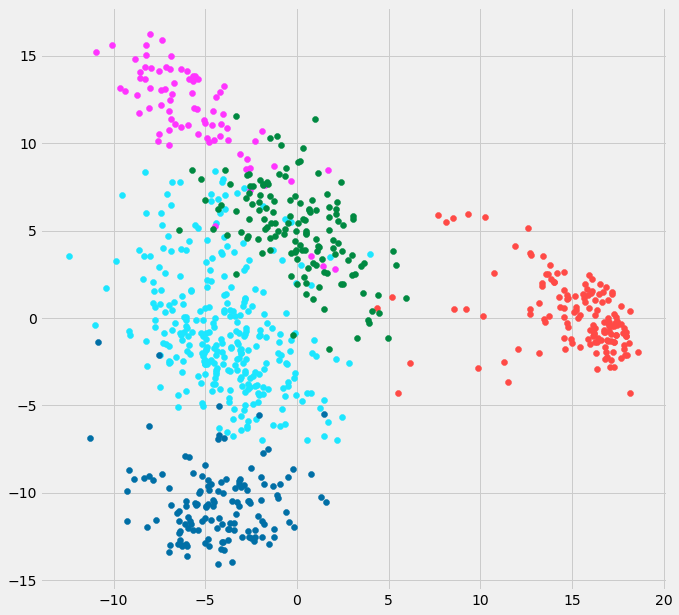

TSNE Visualization


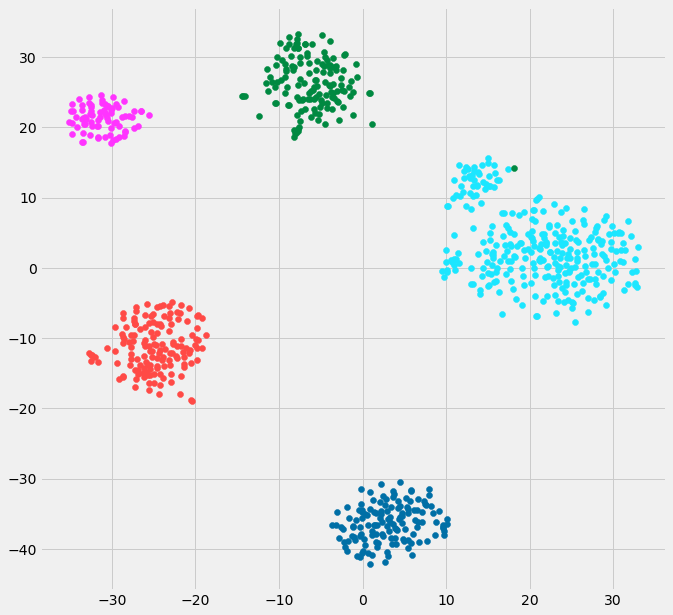

In [82]:
# Visualize data using PCA and TSNE
preprocessor_PCA.fit(data)
preprocessed_PCA_data = preprocessor_PCA.transform(data)
print("PCA Visualization")
plot_clustering(preprocessed_PCA_data, true_labels)

preprocessor_TSNE.fit(data)
preprocessed_TSNE_data = preprocessor_TSNE.fit_transform(data)
print("TSNE Visualization")
plot_clustering(preprocessed_TSNE_data, true_labels)

PCA Labeled Visualization


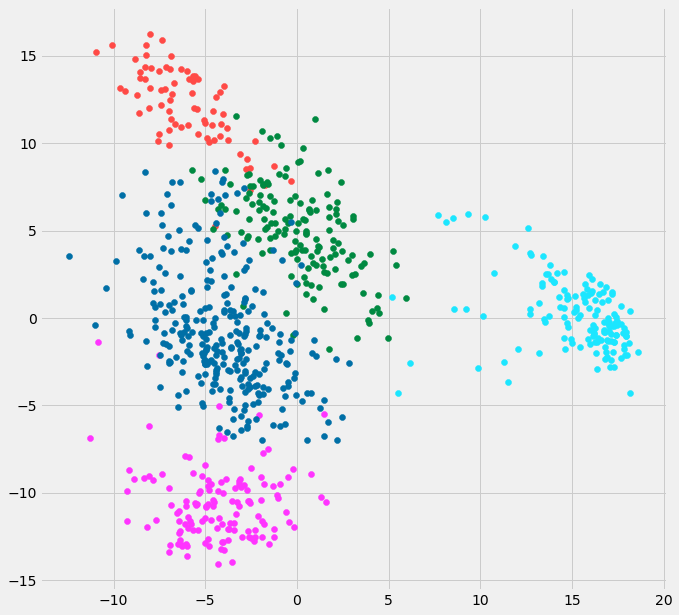

This shows the clustering was pretty good and only slightly overlapped and is better than random


In [86]:
# Task 2: apply k-means clustering to cluster the raw data. Since this is a 20k dimensional space, apply a PCA preprocessing 
# (after using a min-max scaling to standardize the scale of each gene) to reduce the dimensionality.

pipe_PCA.fit(data)
pred_labels = pipe_PCA["clusterer"]["kmeans"].labels_
processed_data = pipe_PCA["preprocessor_PCA"].transform(data)
print('PCA Labeled Visualization')
plot_clustering(processed_data,pred_labels)
print("This shows the clustering was pretty good and only slightly overlapped and is better than random")

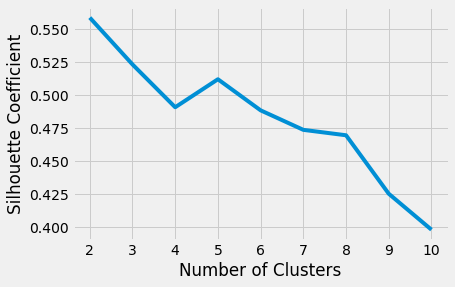

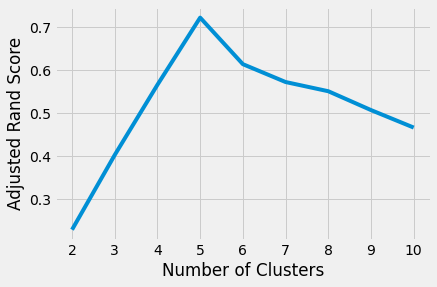

In [115]:
# Task 3:

# Quantify the "silhouette_score" and "adjusted_rand_score" as a function of number of clusters and number of PCA dimensions 
# used. This will help you determine what the most appropriate number of clusters are and what the optimal PCA dimension 
# reduction is. Both are implemented in sklearn as ways to determine quality of clusters WITHOUT knowing labels to begin with.


silhouette_coefficients = []
adj_rand_scores = []   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, init = "k-means++")
#     kmeans.fit(data)

    pipe_PCA["clusterer"]["kmeans"].n_clusters = k
    pipe_PCA.fit(data)
    processed_PCA_data = pipe_PCA["preprocessor_PCA"].transform(data)
    pred_labels = pipe_PCA["clusterer"]["kmeans"].labels_
    
    score = silhouette_score(processed_PCA_data, pred_labels)
    silhouette_coefficients.append(score)
    
    adj_score = adjusted_rand_score(true_labels, pred_labels)
    adj_rand_scores.append(adj_score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()    

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), adj_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Score")
plt.show()   

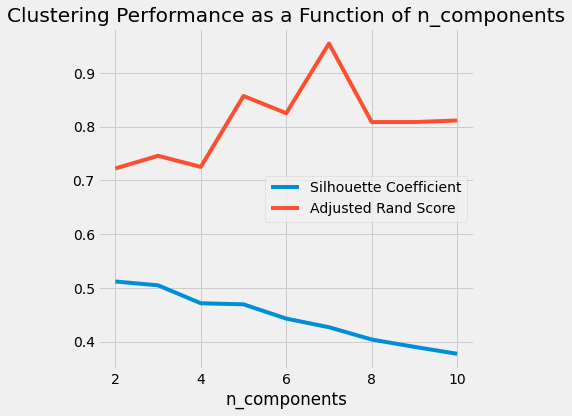

The optimal parameters are: n_clusters = 5, n_components = 7


In [99]:
silhouette_scores = []
ari_scores = [] 
for n in range(2, 11):
# This sets the number of components for pca,
# but leaves other steps unchanged

    pipe_PCA["preprocessor_PCA"]["pca"].n_components = n
    pipe_PCA.fit(data)
    silhouette_coef = silhouette_score(
        pipe_PCA["preprocessor_PCA"].transform(data),
        pipe_PCA["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
    true_labels,
    pipe_PCA["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists

    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)


plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_scores, c="#008fd5", label="Silhouette Coefficient",)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="Adjusted Rand Score")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

# Best optimization parameters, balance of the Silhouette Coefficient and Adjusted Rand Score
print("The optimal parameters are: n_clusters = 5, n_components = 7")

In [112]:
# 4: 4) Once you have found the optimal hyper parameters for k-means, perform the clustering with those parameters and 
# plot your cluster classifications on a 2D t-SNE plot with colors indicating which cluster the particular patient is in.
preprocessor_TSNE["tsne"].n_components = 7
preprocessor_TSNE.fit(data)
processed_TSNE_data = preprocessor_TSNE.fit_transform(data)
clusterer["kmeans"].n_clusters = 5
pred_labels = clusterer["kmeans"].labels_


print('TSNE plot')
plot_clustering(processed_TSNE_data,pred_labels)

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

TSNE does not work with n_components = 7, so here are PCA results:
PCA plot


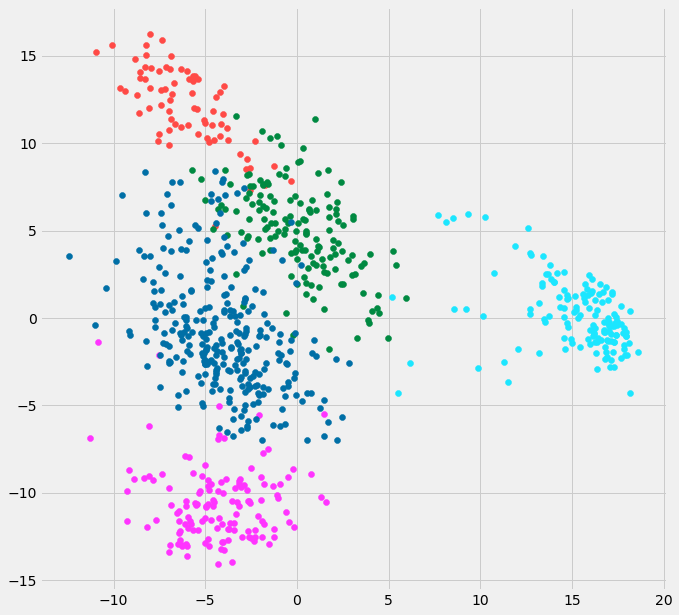

In [116]:
#4: but PCA
print("TSNE does not work with n_components = 7, so here are PCA results:")
pipe_PCA["preprocessor_PCA"]["pca"].n_components = 7
pipe_PCA["clusterer"]["kmeans"].n_clusters = 5
pipe_PCA.fit(data)
processed_PCA_data = pipe_PCA["preprocessor_PCA"].transform(data)
pred_labels = clusterer["kmeans"].labels_


print('PCA plot')
plot_clustering(processed_PCA_data,pred_labels)

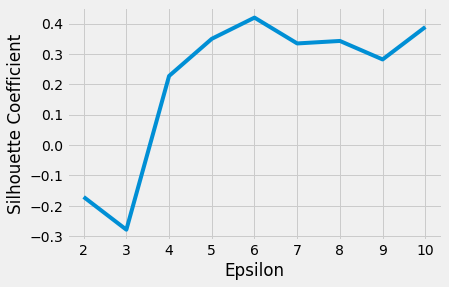

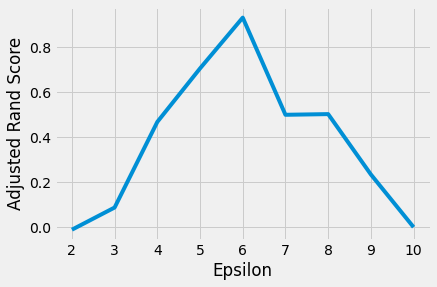

Optimized epsilon = 6


In [127]:
# DBSCAN: Tuning for epsilon

silhouette_coefficients = []
adj_rand_scores = []   
# Notice you start at 2 clusters for silhouette coefficient
for i in range(2,11):
    
    
    pipe_PCA["preprocessor_PCA"]["pca"].n_components = 7
    pipe_PCA.fit(data)
    processed_PCA_data = pipe_PCA["preprocessor_PCA"].transform(data)
    
    dbscan = DBSCAN(eps = i, min_samples=5).fit(processed_PCA_data)
    pred_labels = dbscan.labels_

    
    score = silhouette_score(processed_PCA_data, pred_labels)
    silhouette_coefficients.append(score)
    
    adj_score = adjusted_rand_score(true_labels, pred_labels)
    adj_rand_scores.append(adj_score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Epsilon")
plt.ylabel("Silhouette Coefficient")
plt.show()    

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), adj_rand_scores)
plt.xticks(range(2,11))
plt.xlabel("Epsilon")
plt.ylabel("Adjusted Rand Score")
plt.show()   

print("Optimized epsilon = 6")

TSNE does not work with n_components = 7, so here are PCA results:
PCA plot


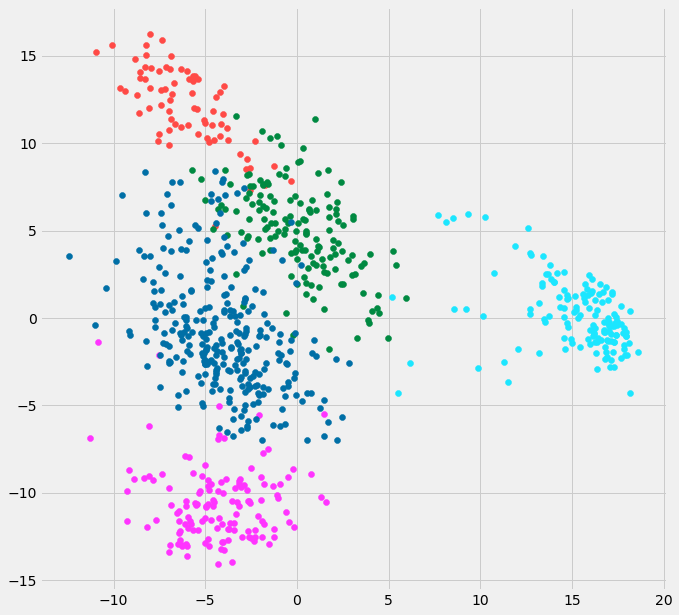

In [128]:
#4: but PCA
print("TSNE does not work with n_components = 7, so here are PCA results:")
pipe_PCA["preprocessor_PCA"]["pca"].n_components = 7
pipe_PCA.fit(data)
processed_PCA_data = pipe_PCA["preprocessor_PCA"].transform(data)
dbscan = DBSCAN(eps = 6, min_samples=5).fit(processed_PCA_data)
pred_labels = dbscan.labels_
pred_labels = clusterer["kmeans"].labels_


print('PCA plot')
plot_clustering(processed_PCA_data,pred_labels)

# Metacognition questions.

Briefly answer these two questions. A few sentences or more is sufficient on each.

1) What did you learn as part of this assignment (hopefully something)?

2) What questions do you still have or is there something you still don't grasp? 

If you understand everything, already knew all of this, did not learn anything new, and don't have any questions, great! Instead of answering the above questions, instead write me a new question (with full solutions) that you think would help illustrate one or more of the points above.

************
1) I learned a lot about clustering and optimizing parameters.
2) I still could learn more about DBScan and t-SNE and how those work.